In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os, glob
import numpy as np
import scipy as sc
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

In [3]:
#You would need to change this filename
# filename = '/Users/sai/Desktop/microwave.wav'
# filename = 'c.wav'
# [print(x) for x in os.walk('.')]
filename='./drive/MyDrive/Colab Notebooks/COSC522/Assignment2/collected_data/microwave/'+'microwave_20221009_165812489.wav'

In [4]:
fs,y=wavfile.read(filename)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [5]:
#y=y[:,0]
y.shape

(2036817,)

In [6]:
FFT_SIZE=1024
f,t,pxx = signal.spectrogram(y, nperseg=FFT_SIZE, fs=fs, noverlap=FFT_SIZE/2)

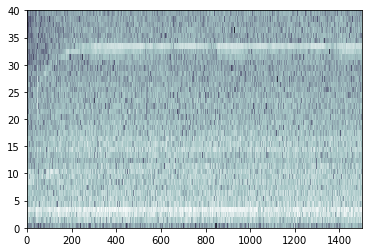

In [18]:
%matplotlib inline
cmap=plt.cm.bone
cmap.set_under(color='k', alpha=None)
plt.pcolormesh(np.log10(pxx[:40,1500:3000]),cmap=cmap)


In [21]:
np.average(pxx[:40,1500:3000])

158.15468

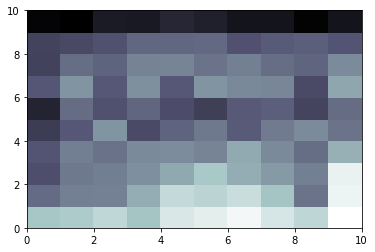

In [31]:
num_freq_bins=10
num_time_bins=10
import cv2

#Open CV's resize takes (columns,rows) as the input for desired size
resized_pxx=cv2.resize(pxx[:,:],(num_time_bins,num_freq_bins))
plt.pcolormesh(np.log10(resized_pxx),cmap=cmap)


In [33]:
# len(f)
resized_pxx[:9,:]

array([[7.34093487e-01, 1.03243709e+00, 2.53278494e+00, 5.91812730e-01,
        8.85098934e+00, 1.38537664e+01, 2.88458004e+01, 7.29377556e+00,
        2.37540627e+00, 5.52017250e+01],
       [4.31486499e-03, 1.32086743e-02, 1.57178398e-02, 1.72657534e-01,
        2.98305893e+00, 1.90794706e+00, 3.86498904e+00, 6.22758031e-01,
        7.06837792e-03, 2.28461685e+01],
       [8.11459613e-04, 9.36719403e-03, 1.22355605e-02, 3.28593217e-02,
        1.26745999e-01, 7.86001325e-01, 1.66038632e-01, 5.90043887e-02,
        1.38283782e-02, 1.86842117e+01],
       [1.23308727e-03, 1.24081429e-02, 6.60882378e-03, 2.39077751e-02,
        2.79007182e-02, 1.72957927e-02, 1.37662768e-01, 2.51960028e-02,
        5.39490674e-03, 2.06739426e-01],
       [2.11673512e-04, 1.49993319e-03, 4.25773300e-02, 6.33774849e-04,
        2.87263980e-03, 9.69193131e-03, 1.85360853e-03, 1.13392416e-02,
        2.67184675e-02, 7.14051165e-03],
       [3.04042151e-05, 4.58913250e-03, 9.58868011e-04, 3.33376415e-03,
   

### Combining the FFT portion to experiment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 100
f = 3
x = np.arange(sampling_rate) #[ 0  1  2  3  4  5  6  7 ... 98 99]
y1 = np.sin(2*np.pi*f*(x/sampling_rate)) #sine function

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


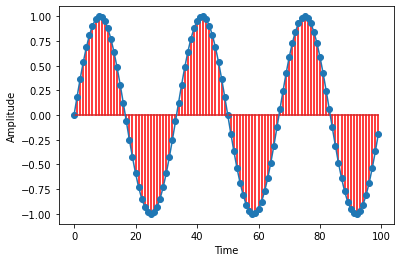

In [ ]:
plt.figure()
plt.stem(x,y1,'r')
plt.plot(x,y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
from scipy.fftpack import fft

def fft_method(audio, sampling_rate):
    # variables
    T = 1/sampling_rate
    N = len(audio)
    max_val = 1.0/(2.0*T) # max frequency spectrum of the FFT.
    num_vals = N//2  
    
    # calculate fft
    yf_all = fft(audio)
    
    xf = np.linspace(0.0, max_val, num_vals)
    yf = 2.0/N * np.abs(yf_all[0:num_vals])
    
    return xf, yf

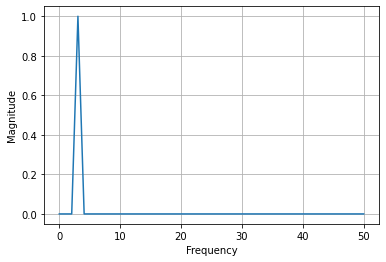

In [ ]:
xf, yf = fft_method(y1, sampling_rate)

fig, ax = plt.subplots()
ax.plot(xf, yf)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()